## Przybliżenie WKB (Wentzla-Kramesa-Brillouina)

Przybliżenie WKB - przybliżona metoda rozwiązania równania Schrödingera polegająca na założeniu, że funkcja falowa $\psi$ jest falą płaską o współczynnikach zniekształconych przez obecność potencjału $V(x)$.

$$\psi(x) = A(x) e^{i\phi(x)}$$

Przybliżenie WKB możemy stosować dla systemów w których zmiany potencjału $V(x)$ są małe dla długości fali De Broglie'a cząstki.


Zakładamy, że zmiana współczynników fazy i amplitudy następuje powoli.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.core.display import HTML
import sympy as sp
from sympy.utilities.lambdify import lambdify
sp.init_printing()
from scipy.integrate import quad
from scipy.constants import hbar

In [2]:
Ev = 1

In [3]:
def Vv(xv):
    return (xv - 1)**4 + (xv - 1) + 1

Rozważamy przypadek dla $V(x) = (x-1)^4+x$ , oraz $E = 1$

$$V(x_1) = V(x_2) = E$$

In [4]:
xvplt = np.linspace(-0.5, 1.5 ,1000)
vvplt = Vv(xvplt)
Evplt = [1 for xv in range(1000)]

<Figure size 1440x720 with 0 Axes>

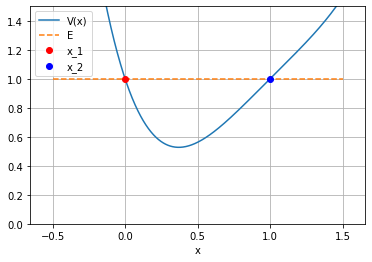

In [5]:
plt.figure(figsize = (20,10))

fig, ax = plt.subplots()
plt.plot(xvplt, vvplt, label = 'V(x)')
plt.plot(xvplt, Evplt, '--', label = 'E')
plt.axis('equal')
plt.plot([0], [1], 'ro', label = 'x_1')
plt.plot([1], [1], 'bo', label = 'x_2')
plt.grid()
plt.xlabel('x')
leg = ax.legend();
plt.gca().set_ylim(0, 1.5)

1. Dla E > V(x):

Funkcja falowa dla stałego potencjału $V = const.$ przyjmuje formę:$$\psi(x) = A e^{\pm ikx},$$

gdzie:$$k(x) = \frac{\sqrt{2m(E-V(X))}}{\hbar}$$

Zgodnie z założeniami przybliżenia zakładamy, że w obecności zmiennego potencjału $V(x)$ współczynniki fazy i amplitudy są zmienne i zależą od $x$:

$$\psi(x) = A(x) e^{i\phi(x)}$$

Otrzymana funkcja falowa musi spełniać niezależne od czasu Równanie Schrödingera:

$$-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi = E \psi$$

$$-\hbar^2 \frac{d^2\psi}{dx^2}  = 2m(E - V(x)) \psi$$

$$p(x) = \sqrt{2m(E-V(x))}$$

$$\frac{d^2\psi}{dx^2} = - \frac{p(x)^2}{\hbar^2}\psi$$

In [6]:
psie = sp.Function('psi', complex = True)
Ae = sp.Function('A', real = True)
phie = sp.Function('phi', real = True)
xe = sp.Symbol('x', real = True)
psie(xe), Ae(xe), phie(xe)

In [7]:
psie = Ae(xe) * sp.exp(sp.I * phie(xe) )
psie

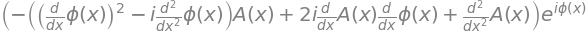

In [8]:
pside = psie.diff(xe,xe).simplify()
pside

$$\frac{d^2\psi}{dx^2} = \left[ A''(x) + 2iA(x)'\phi'(x) + i A(x)\phi''(x) - A(x)(\phi'(x))^2 \right] e^{i\phi(x)} = - \frac{p^2}{\hbar^2}A(x)e^{i\phi(x)}$$

$$ A'' + 2iA'\phi' + i A\phi'' - A(\phi')^2 = -\frac{p^2}{\hbar^2}A$$

Część rzeczywista: $$ A'' - A(\phi')^2 = -\frac{p^2}{\hbar^2}A $$

$$A'' = A \left[ (\phi')^2 -\frac{p^2}{\hbar^2} \right]$$

Zakładamy, że zmiana amplitudy jest niewielka, zatem: $$A'' \ll (\phi')^2, \frac{p^2}{\hbar^2}\;,\;\;\;\;A''\approx 0 $$

$$A\left[ (\phi')^2 -\frac{p^2}{\hbar^2} \right]=0$$

$$(\phi')^2 =\frac{p^2}{\hbar^2}$$

$$\phi' =\pm\frac{p}{\hbar}$$

$$\phi(x) = \pm\frac{1}{\hbar} \int p(x) dx$$

Część urojona:$$2A'\phi' + A\phi'' = 0$$

$$2AA'\phi' + A^2\phi'' = 0$$

$$(A^2\phi')' = 0$$

$$A^2\phi' = B^2 \rightarrow A(x) = \frac{B}{\sqrt{\phi'(x)}}$$

Z poprzedniego równania: $$\phi'(x) = \pm\frac{p(x)}{\hbar}$$

$$A(x) = \frac{C}{\sqrt{p(x)}}$$

Zatem funkcja falowa ma przybliżoną  postać: $$\psi(x) \approx \frac{C}{\sqrt{p(x)}}e^{\pm\frac{i}{\hbar}\int p(x) dx}$$

$$\psi(x) = \frac{1}{\sqrt{p(x)}}  \left[C_+e^{\frac{i}{\hbar}\int p(x) dx} + C_- e^{-\frac{i}{\hbar}\int p(x) dx}\right] $$

$$\psi(x) = \frac{1}{\sqrt{p(x)}}  \left[ C_1 \sin{ \left(\frac{1}{\hbar}\int p(x) dx \right)} + C_2 \cos{ \left( \frac{1}{\hbar}\int p(x) dx \right) }\right] $$

2. Dla E < V(x)

Dla stałego potencjału: $$\psi(x) = A e^{\pm \kappa x}$$ 

gdzie: $$\kappa = \frac{\sqrt{2m(V(x) - E)}}{\hbar}$$

Szukamy rozwiązania w postaci fali płaskiej o zmiennych współczynnikach:

$$\psi(x) = A(x) e^{i\phi(x)}$$

Rozwiązanie jest takie samo jak dla $E > V(x)$ z tą różnicą że pęd przyjmuje wartości urojone:

 $$p(x)^2 = 2m(E - V(x)) < 0 \rightarrow p(x) = i \sqrt{2m(E - V(x))} $$

$$(\phi')^2 =\frac{p^2}{\hbar^2} = -\frac{|p|^2}{\hbar^2}$$

$$\phi' = \pm i \frac{|p|}{\hbar}$$

Zatem: $$\phi(x) = \pm\frac{i}{\hbar}\int |p(x)|dx$$

$$\psi(x) \approx \frac{D}{\sqrt{|p(x)|}}e^{\pm\frac{1}{\hbar}\int |p(x)|dx}$$

$$\psi(x) \approx \frac{1}{\sqrt{|p(x)|}} \left[ D_+ e^{\frac{1}{\hbar}\int |p(x)|dx} + D_- e^{-\frac{1}{\hbar}\int |p(x)|dx}   \right]$$

Funkcja falowa musi być zbieżna w nieskończonościach, zatem dla $x < x_1$:

$$\psi(x) = \frac{D}{\sqrt{|p(x)|}}e^{\frac{1}{\hbar}\int |p(x)|dx}$$

dla $x > x_2$:

$$\psi(x) = \frac{D}{\sqrt{|p(x)|}}e^{-\frac{1}{\hbar}\int |p(x)|dx}$$

Funkcja falowa: $$\psi(x)= 
\begin{cases} 
    \frac{D}{\sqrt{|p(x)|}}e^{\frac{1}{\hbar}\int |p(x)|dx} & x < x_1\\
    \frac{1}{\sqrt{p(x)}}  \left[C_+e^{\frac{i}{\hbar}\int_{x_2}^{x} p(x) dx} + C_- e^{-\frac{i}{\hbar}\int_{x_2}^{x} p(x) dx}\right] & x_1 < x < x_2 \\
      \frac{D}{\sqrt{|p(x)|}}e^{-\frac{1}{\hbar}\int_{x_2}^{x} |p(x)|dx} &  x > x_2
   \end{cases}$$



W punktach $x_1$ i $x_2$ $E = V(x_1) = V(x_2)$, oraz $p(x) = 0$. Oznacza to, że funkcja falowa w otoczeniu tych punktów jest rozbieżna do nieskończoności.

W otoczeniu punktu $x_2$ funkcja falowa:

Związek pomiędzy współczynnikami $C_+, C_-, D$:

$$ C_+ = -ie^{i\pi/4} D,\;\;\;\;\;\;C_- = ie^{-i\pi/4} D  $$

$$\frac{1}{\sqrt{p(x)}}  \left[C_+e^{\frac{i}{\hbar}\int_{x_2}^{x} p(x) dx} + C_- e^{-\frac{i}{\hbar}\int_{x_2}^{x} p(x) dx}\right] =$$

$$=\frac{1}{\sqrt{p(x)}}  \left[-i D e^{\frac{i}{\hbar}\int_{x_2}^{x} p(x) dx + i\pi/4} + iD e^{-i \left( \frac{1}{\hbar}\int_{x_2}^{x} p(x) dx + \pi/4 \right)}\right] = $$

$$= \frac{2D}{\sqrt{p(x)}}\sin{\left(- \frac{1}{\hbar}\int_{x}^{x_2} p(x) dx + \pi/4 \right)}$$

In [9]:
p = sp.Function('p', complex = True)
psi = sp.Function('psi', complex = True)
V = sp.Function('V', real = True)
x = sp.Symbol('x', real = True)
h = sp.Symbol('hbar', real = True, positive = True)
D = sp.Symbol('D')
m = sp.Symbol('m', real = True, positive = True)
E = sp.Symbol('E', real = True, positive = True)
x1 = sp.Symbol('x_1', real = True)
x2 = sp.Symbol('x_2', real = True)
xp = sp.Symbol("xp", real = True)
p(xp), psi(xp), V(xp), x, h, D, m, E, x1, x2, xp

In [10]:
V = (xp-1)**4 + xp
V

In [11]:
p = sp.sqrt(2*m*(E-V))
p

In [12]:
p = p.subs({m: 1, E: 1})
p

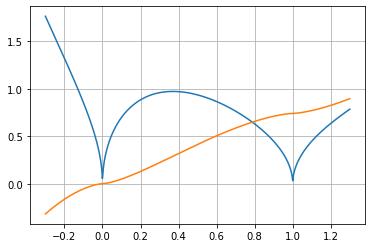

In [13]:
def pp(x):
    #if x >= 0 and x <= 1:
    return np.sqrt(2*(1-x-(x-1)**4) + 0j)
    #else:
        #return 1j*np.abs(np.sqrt(2*(-1+x+(x-1)**4)))
def pp_abs(x):
     return np.abs(np.sqrt(2*(1-x-(x-1)**4) + 0j))

xplt1 = np.linspace(-0.3, 1.3, 1000)
#rplt1 = []
#iplt1 = []
absplt1 = []
for i in range(1000):
#    rplt1.append(np.real(pp(xplt1[i])))
#    iplt1.append(np.imag(pp(xplt1[i])))
    absplt1.append(pp_abs(xplt1[i]))

plt.plot(xplt1, absplt1)
#plt.plot(xplt1, rplt1)
#plt.plot(xplt1, ilt1)

def pp_int(x):
    res, err = quad(pp_abs, 0, x)
    return res

def pp_int_x2(x):
    res, err = quad(pp_abs, 1, x)
    return res


def pp_int_x1(x):
    res, err = quad(pp_abs, 0, x)
    return res


intplt1 = []
for i in range(1000):
    intplt1.append(pp_int(xplt1[i]))
    
plt.plot(xplt1, intplt1)
plt.grid()

In [14]:
def psi(A,x):
    if x > 0 and x < 1:
        return -A*2/pp_abs(x)*np.sin(pp_int(x)/hbar/10**32+np.pi/4)
    elif x >= 1:
        return A*1/pp_abs(x)*np.exp(-pp_int_x2(x)/hbar/10**32)
    elif x <= 0:
        return A*1/pp_abs(x)*np.exp(pp_int_x1(x)/hbar/10**32)

In [15]:
def psi2(x):
    return psi(1,x)**2

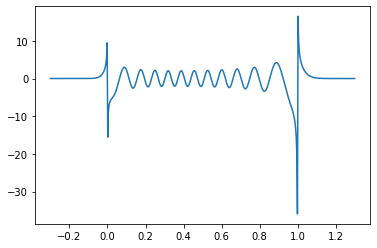

In [16]:
x = np.linspace(-0.3, 1.3, 500)
y = []
for i in range(500):
    y.append(psi(1,x[i]))
    
plt.plot(x, y)

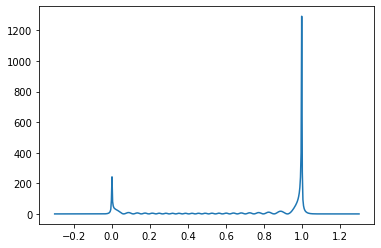

In [17]:
y = []
for i in range(500):
    y.append(psi2(x[i]))
    
plt.plot(x, y)

In [18]:
invA = quad(psi2, 0, 1)[0] + quad(psi2, -np.inf, 0)[0] + quad(psi2, 1, np.inf)[0]
A = np.sqrt(1/invA)
A

C:\Users\Radek\AppData\Local\Temp\ipykernel_10052\4242093572.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  invA = quad(psi2, 0, 1)[0] + quad(psi2, -np.inf, 0)[0] + quad(psi2, 1, np.inf)[0]
C:\Users\Radek\AppData\Local\Temp\ipykernel_10052\4242093572.py:1: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  invA = quad(psi2, 0, 1)[0] + quad(psi2, -np.inf, 0)[0] + quad(psi2, 1, np.inf)[0]
C:\Users\Radek\AppData\Local\Temp\ipykernel_10052\465244107.py:27: IntegrationWarning: Extremely bad integrand behavior occurs at some 

In [19]:
def psiNorm(x):
    return psi(A, x)

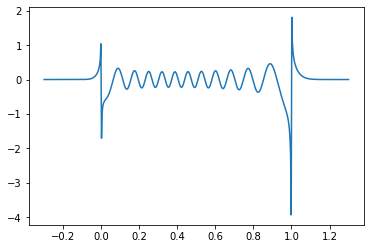

In [20]:
y = []
for i in range(500):
    y.append(psiNorm(x[i]))
    
plt.plot(x, y)

In [21]:
def psiNorm2(x):
    return psiNorm(x)**2

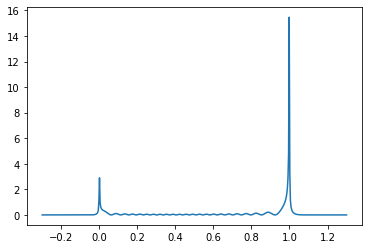

In [22]:
y = []
for i in range(500):
    y.append(psiNorm2(x[i]))
    
plt.plot(x, y)

In [23]:
#quad(psiNorm2, 0, 1), quad(psiNorm2, -np.inf, 0), quad(psiNorm2, 1, np.inf)
quad(psiNorm2, 0, 1)[0] + quad(psiNorm2, -np.inf, 0)[0] + quad(psiNorm2, 1, np.inf)[0]

C:\Users\Radek\AppData\Local\Temp\ipykernel_10052\3632304348.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(psiNorm2, 0, 1)[0] + quad(psiNorm2, -np.inf, 0)[0] + quad(psiNorm2, 1, np.inf)[0]
C:\Users\Radek\AppData\Local\Temp\ipykernel_10052\3632304348.py:2: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  quad(psiNorm2, 0, 1)[0] + quad(psiNorm2, -np.inf, 0)[0] + quad(psiNorm2, 1, np.inf)[0]
C:\Users\Radek\AppData\Local\Temp\ipykernel_10052\465244107.py:27: IntegrationWarning: Extremely bad integrand behavior occur

In [24]:
pp = sp.Function('pp', complex = True)
x = sp.Symbol('x', real = True)
y = sp.Symbol('y', real = True)
pp(y), x

In [25]:
pp = sp.Abs(sp.sqrt(2*(1-((y-1)**4)+1-y)))
pp

In [26]:
ppl = lambdify((y), pp)

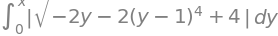

In [27]:
ppi = sp.integrate(pp, (y, 0, x))
ppi

In [28]:
ppif = lambdify((x), ppi)

In [29]:
xplt = np.linspace(0, 1, 1000)
yplt = []
zplt = []
for i in range(1000):
    yplt.append(np.real(ppif(xplt[i])))
    zplt.append(np.imag(ppif(xplt[i])))
    

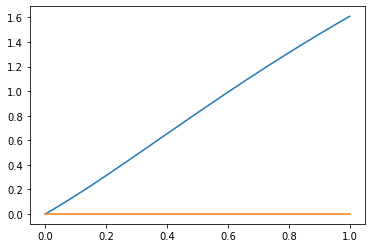

In [30]:
plt.plot(xplt, yplt)
plt.plot(xplt, zplt)

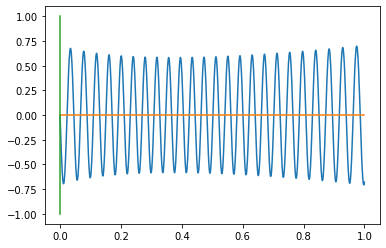

In [31]:
sinplt = []
for i in range(1000):
    sinplt.append(1/ppl(xplt[i])*np.sin(-ppif(xplt[i])/hbar/10**32))
plt.plot(xplt, sinplt)
plt.plot([-0,1], [0,0])
plt.plot([-0,0], [-1,1])

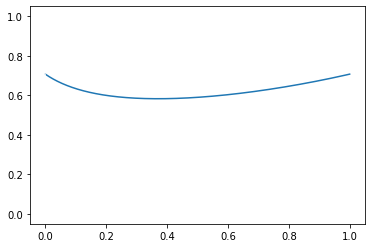

In [33]:
yplt2 = []
for i in range(1000):
    yplt2.append(1/ppl(xplt[i]))
plt.plot(xplt, yplt2)
plt.plot([0,0], [0,1], 'w--')

Aby uzyskana funkcja falowa była ciągła i całkowalna dla $x \in \mathbb{R}$ jej poziomy muszą przyjwować dyskretne wartości, takie jak dla oscylatora harmonicznego:

$$E_n = \hbar \omega \left( n+\frac{1}{2} \right)$$

W tym celu energia cząstki w niecce potencjału musi spełaniać warunek:

$$\int_{x_1}^{x_2} \sqrt{2m(E-V(x))} = \hbar \omega \left( n+\frac{1}{2} \right)$$

In [115]:
E = sp.Symbol('E', Real = True, positive = True)
p = sp.Function('p', complex = True)
V = sp.Function('V', complex = True)
x = sp.Symbol('x', Real = True)
x1 = sp.Function('x_1', Real = True)
x2 = sp.Function('x_2', Real = True)
m = sp.Symbol('m', Real = True, positive = True)
h = sp.Symbol('hbar', Real = True, positive = True)
n = sp.Symbol('n', Real = True, positive = True, integer = True)
E, p(x), V(x), x, x1(E), x2(E), m, h, n

In [116]:
V = x**2+0.5
V

In [117]:
p = sp.sqrt(2*m*(E-V))
p

Wartości punktów powrotu $x_1$ i $x_2$ w zależności od energii $E$:

In [118]:
x1, x2 = -sp.sqrt((-1+2*E)/2), sp.sqrt((-1+2*E)/2)

Wartości Energii:
$$\int_{x_1}^{x^2}p(x)dx = \hbar \pi \left(\frac{1}{2} + n \right)$$

In [119]:
E = sp.integrate(p.subs(m,1), (x, x1, x2), conds = 'none').simplify()
E

⎧                                                                     ________
⎪                                                                   ╲╱ E - 1/2
⎪                                                                        ⌠    
⎪                                                                        ⎮    
⎪                                                                        ⎮    
⎪                                                                        ⎮    
⎪                                                                        ⎮    
⎪                                                                        ⎮    
⎪                                                                        ⎮    
⎪                                                                        ⎮    
⎪                                                                        ⎮    
⎪                                                                        ⎮    
⎪                                                   

In [86]:
eq = sp.Eq(E, sp.pi*(1/2+n))
E1 = sp.solve(eq.subs(n,1), E)[0]
E1
#x1.subs(E,E1), x2.subs(E, E1)